<a href="https://colab.research.google.com/github/glintec-education/MIA_1C_AA_91224/blob/master/Act1_Par2_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autor: GÓMEZ SÁNCHEZ ANGEL DAVID
### File: Act1_Par2_Algoritmos.ipynb


In [45]:
import pandas as pd

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset
url="https://raw.githubusercontent.com/glintec-education/MIA_1C_AA_91224/refs/heads/master/remote_work_productivity.csv"
# df = pd.read_csv('remote_work_productivity.csv')
df = pd.read_csv(url)

# Ver las primeras filas del dataset
print(df.info())
print(df.isnull().sum())

print("\nValores nulos para columnas numericas:")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
  print(df[col].isnull().sum())

print("\nValores nulos para columnas categoricas:")
for col in df.select_dtypes(include=['object']).columns:
  print(df[col].isnull().sum())

print(df)
#Define las clases contenidas en esa columna
df['Employment_Type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            1000 non-null   int64 
 1   Employment_Type        1000 non-null   object
 2   Hours_Worked_Per_Week  1000 non-null   int64 
 3   Productivity_Score     1000 non-null   int64 
 4   Well_Being_Score       1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64

Valores nulos para columnas numericas:
0
0
0
0

Valores nulos para columnas categoricas:
0
     Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0              1          Remote                     29                  75   
1              2       In-Office                     45                  49   
2    

array(['Remote', 'In-Office'], dtype=object)

## NORMALIZACION y ESTANDARIZACION DE DATOS

In [46]:
#NORMALIZACION y ESTANDARIZACION DE DATOS
from sklearn.preprocessing import StandardScaler
#Escalamiento de datos [0, 1]
from sklearn.preprocessing import MinMaxScaler


# # Cargar el dataset
# df = pd.read_csv('remote_work_productivity.csv')
# print(df.info())

# Lista de variables
variables = ['Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score']

# scaler = StandardScaler()
scaler = MinMaxScaler()
print("--------PREVIO A LA NORMALIZACION-----------")
print(df.head())

# Bucle para nromalizacion mediante MinMaxScaler
for var in variables:
  df[var] = scaler.fit_transform(df[[var]])

print("--------POSTERIOR A LA NORMALIZACION-----------")
# print("--------STANDARDSCALER-----------")
print("--------MINMAXSCALES-----------")
print(df.head())

--------PREVIO A LA NORMALIZACION-----------
   Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1          Remote                     29                  75   
1            2       In-Office                     45                  49   
2            3          Remote                     34                  74   
3            4          Remote                     25                  81   
4            5          Remote                     50                  70   

   Well_Being_Score  
0                78  
1                47  
2                89  
3                84  
4                74  
--------POSTERIOR A LA NORMALIZACION-----------
--------MINMAXSCALES-----------
   Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1          Remote               0.270833            0.531646   
1            2       In-Office               0.604167            0.202532   
2            3          Remote               0.37

## Cambiar variables categoricas a numericas

In [47]:
#Cambiar variabels categoricas a numericas
from sklearn.preprocessing import LabelEncoder

# 1.- Crear un objeto LabelEncoder
label_encoder = LabelEncoder()
# Convertir la variable categórica a numérica
df['Employment_Type'] = label_encoder.fit_transform(df['Employment_Type'])
print(df.head())

   Employee_ID  Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1                1               0.270833            0.531646   
1            2                0               0.604167            0.202532   
2            3                1               0.375000            0.518987   
3            4                1               0.187500            0.607595   
4            5                1               0.708333            0.468354   

   Well_Being_Score  
0          0.711111  
1          0.366667  
2          0.833333  
3          0.777778  
4          0.666667  


In [48]:
#DEFINICION DE LAS VARIABLES DEPENDIENTES E INDEPENDIENTES
X=df.drop(columns=['Employment_Type'])
y=df['Employment_Type']
print('Subset de X: \n',X.head())
print('Var Ind: \n',y.head())

Subset de X: 
    Employee_ID  Hours_Worked_Per_Week  Productivity_Score  Well_Being_Score
0            1               0.270833            0.531646          0.711111
1            2               0.604167            0.202532          0.366667
2            3               0.375000            0.518987          0.833333
3            4               0.187500            0.607595          0.777778
4            5               0.708333            0.468354          0.666667
Var Ind: 
 0    1
1    0
2    1
3    1
4    1
Name: Employment_Type, dtype: int64


## Metodo RFE

In [49]:
#implementar RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # O el modelo que prefieras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
# # Codificar variables categóricas (por ejemplo, 'Employment_Type')
# le = LabelEncoder()
# y['Employment_Type'] = le.fit_transform(y['Employment_Type'])

# 1.- Crear un objeto LabelEncoder
label_encoder = LabelEncoder()
# Convertir la variable categórica a numérica
df['Employment_Type'] = label_encoder.fit_transform(df['Employment_Type'])
# Mostrar el resultado
print(df['Employment_Type'])
y=df['Employment_Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = LinearRegression()

# Aplicar RFE: 3 características importantes
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Ver cuáles son las características seleccionadas
print("Características seleccionadas:", X.columns[rfe.support_])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: Employment_Type, Length: 1000, dtype: int64
Características seleccionadas: Index(['Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score'], dtype='object')
(800, 4)
(800,)
(200, 4)
(200,)




## Incio de matriz de correlacion

                       Employee_ID  Employment_Type  Hours_Worked_Per_Week  \
Employee_ID               1.000000         0.010387              -0.027052   
Employment_Type           0.010387         1.000000              -0.597426   
Hours_Worked_Per_Week    -0.027052        -0.597426               1.000000   
Productivity_Score        0.032728         0.402885              -0.254549   
Well_Being_Score          0.008498         0.390199              -0.251574   

                       Productivity_Score  Well_Being_Score  
Employee_ID                      0.032728          0.008498  
Employment_Type                  0.402885          0.390199  
Hours_Worked_Per_Week           -0.254549         -0.251574  
Productivity_Score               1.000000          0.135163  
Well_Being_Score                 0.135163          1.000000  


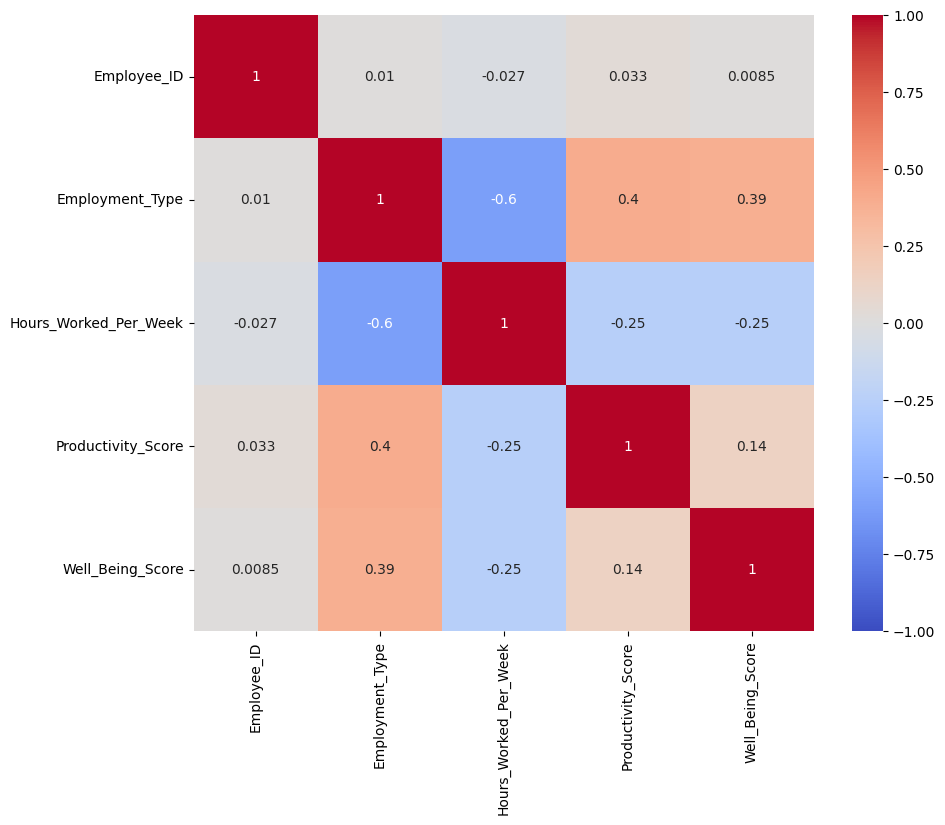

Características eliminadas debido a alta correlación: set()
Nuevo conjunto de datos:
    Employee_ID  Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1                1               0.270833            0.531646   
1            2                0               0.604167            0.202532   
2            3                1               0.375000            0.518987   
3            4                1               0.187500            0.607595   
4            5                1               0.708333            0.468354   

   Well_Being_Score  
0          0.711111  
1          0.366667  
2          0.833333  
3          0.777778  
4          0.666667  




In [50]:
#Matriz de correlacion

# print(df.head())

# 1. Calcular la Matriz de Correlación
import pandas as pd

# Cargar el dataset
# df = pd.read_csv('remote_work_productivity.csv')

# df.drop(columns=['Employee_ID'], inplace=True)
# print(df.head())

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# 2. Identificar Variables Altamente Correlacionadas
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


# 3. Eliminar Características Redundantes
# Establecer un umbral de correlación (0.85)
threshold = 0.85

# Obtener las parejas de columnas que tienen una alta correlación
highly_correlated = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Eliminar las columnas con alta correlación
df_reduced = df.drop(columns=highly_correlated)

print(f"Características eliminadas debido a alta correlación: {highly_correlated}")
print("Nuevo conjunto de datos:\n", df_reduced.head())
print("\n")


# # 4. Usar las Características Restantes

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Supón que 'Productivity_Score' es la variable objetivo
# X = df_reduced.drop('Productivity_Score', axis=1)
# y = df_reduced['Productivity_Score']

# # Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Crear el modelo (puedes usar cualquier modelo que prefieras)
# model = LinearRegression()

# # Entrenar el modelo
# model.fit(X_train, y_train)

# # Evaluar el modelo
# score = model.score(X_test, y_test)
# print(f"Precisión del modelo: {score}")



## Entrenamiento de arbol de desicion prueba 1

['Employee_ID' 'Hours_Worked_Per_Week' 'Productivity_Score'
 'Well_Being_Score']


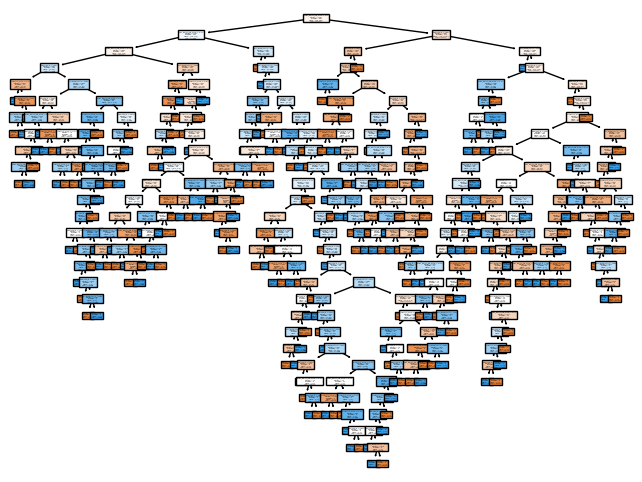

[0.735 0.765 0.715 0.785 0.77 ]
0.754


In [57]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion="entropy", random_state=0)
arbol_c =modelo.fit(X_train,y_train)

y_pred= modelo.predict(X_test)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# print(y.head())
# print(y.shape)
# print(y.values)
print(X.columns.values)

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
# tree.plot_tree(arbol_c, feature_names=list(X.columns.values), class_names = list(y.values), filled=True)
tree.plot_tree(arbol_c, feature_names=list(X.columns.values), class_names = ["In-office","Remote"], filled=True)

plt.show()


# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones y evaluar
y_pred = model.predict(X_test)



# 6. Evaluación del modelo
# Aquí vamos a implementar k-fold cross validation para k=5, obtendremos 5 accuracy
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(modelo, X, y,
                         scoring="accuracy",
                         cv=5, n_jobs=-1)  #cv es k
print(scores)
print(np.mean(scores))


# from sklearn.metrics import confusion_matrix, classification_report
# # Evaluar el modelo de clasificación
# # print("Matriz de confusión:")
# # print(confusion_matrix(y_test, y_pred))

# print("\nReporte de clasificación:")
# print(classification_report(y_test, y_pred))


## Entrenamiento de arbol de decisión prueba 2

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# # Caso 1: Árbol de Decisión para regresion (si y es numerica)
# # Crear el modelo de Árbol de Decisión para regresión
# model = DecisionTreeRegressor(random_state=42)
# # Entrenar el modelo con el conjunto de entrenamiento
# model.fit(X_train, y_train)
# # Realizar predicciones con el conjunto de prueba
# y_pred = model.predict(X_test)
# # Evaluar el modelo (por ejemplo, utilizando el error cuadrático medio)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Error cuadrático medio: {mse}")


# Caso 2: Árbol de Decisión para clasificación (si y es categórica)
# Si y es categórica, usamos DecisionTreeClassifier
# Ejemplo: Convertir 'Productivity_Score' a categorías (Alta/Baja)
# y = y.apply(lambda x: 'Alta' if x >= 75 else 'Baja')  # Esta es solo una conversión de ejemplo

# Crear el modelo de Árbol de Decisión para clasificación
model = DecisionTreeClassifier(random_state=42)

# modelo = DecisionTreeClassifier(criterion="entropy", random_state=0)
# arbol_c =modelo.fit(x_train,y_train)

scores = cross_val_score(modelo, X, y,
                         scoring="accuracy",
                         cv=5, n_jobs=-1)
print('Marcador para Arbol de decision: ',scores)
print(np.mean(scores))


# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# # 4. Visualización del Árbol de Decisión
# # Visualización del Árbol de Decisión
# plt.figure(figsize=(12, 8))
# tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["In-office","Remote"], rounded=True, fontsize=10)
# plt.show()


Marcador para Arbol de decision:  [0.78  0.855 0.77  0.82  0.825]
0.8099999999999999
Precisión del modelo: 0.475


## Entrenamiento RandomForest

In [56]:
#RandomForest
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


modelo = RandomForestClassifier(random_state=0)

scores = cross_val_score(modelo, X, y,
                         scoring="accuracy",
                         cv=5, n_jobs=-1)
print('Marcador para RandomForest: ', scores)
print(np.mean(scores))

x_train, x_test, y_train, y_test = tts(X,y, test_size=0.2)
arbol_c =modelo.fit(x_train,y_train)
y_pred= modelo.predict(x_test)
accuracy_score(y_test,y_pred)

C=confusion_matrix(y_pred, y_test)
print(C)


Marcador para RandomForest:  [0.78  0.855 0.77  0.82  0.825]
0.8099999999999999
[[71 23]
 [21 85]]
